In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
data = pd.read_csv('data_system.csv')
data = data[data.columns[:-1]]
# data = data[data['Wait time']>=0]
# data = data[data['Customer']>999]

In [9]:
data

,Customer,Time of arrival,Number of people at arrival,Which 10 min interval in day,Which day in week,Time of start of service,Departure time,Wait time
0,0,5.50038,1,0,0,42.8781,80.2382,37.3777
1,1,93.96750,1,9,0,126.1380,165.6450,32.1707
2,2,158.01000,2,15,0,178.0440,195.4160,20.0332
3,3,165.66400,2,16,0,204.1290,235.3680,38.4647
4,4,197.44500,2,19,0,237.6360,269.2720,40.1915
...,...,...,...,...,...,...,...,...
661,661,9564.06000,8,92,6,9596.9800,9627.4200,32.9219
662,662,9570.20000,8,93,6,9594.5600,9611.2900,24.3623
663,663,9579.32000,6,93,6,9613.7300,9647.5300,34.4092
664,664,9580.53000,7,94,6,9626.2900,9668.6300,45.7549


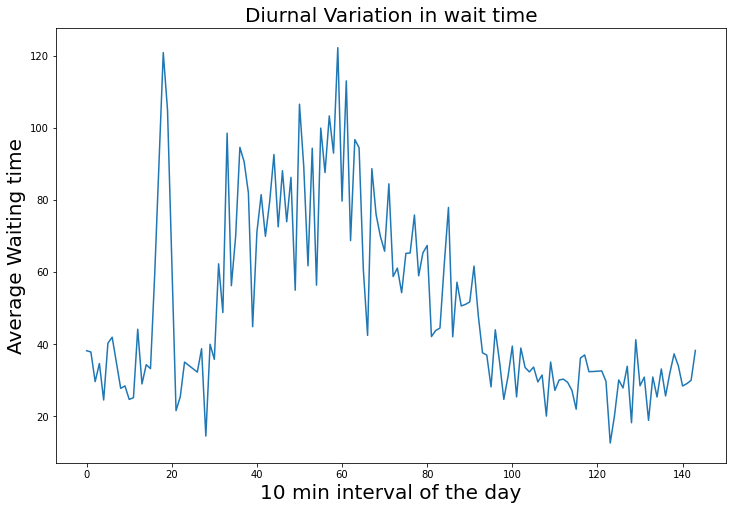

In [10]:
temp = data[data['Wait time']>0].groupby(by='Which 10 min interval in day').mean()
fig = plt.figure(figsize=(12,8))
plt.plot(temp['Wait time'])
plt.title('Diurnal Variation in wait time',fontsize=20)
plt.xlabel('10 min interval of the day',fontsize=20)
plt.ylabel('Average Waiting time',fontsize=20)
# plt.grid(True)
plt.show()

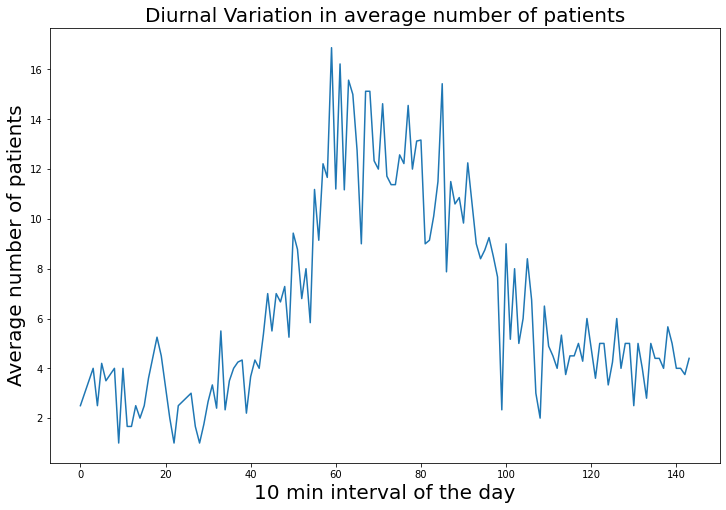

In [11]:
temp = data[data['Wait time']>0].groupby(by='Which 10 min interval in day').mean()
fig = plt.figure(figsize=(12,8))
plt.plot(temp['Number of people at arrival'])
plt.title('Diurnal Variation in average number of patients',fontsize=20)
plt.xlabel('10 min interval of the day',fontsize=20)
plt.ylabel('Average number of patients',fontsize=20)
# plt.grid(True)
plt.show()

In [0]:
def C(t):
    if t<10:
        return 3
    elif t<120:
        return 2
    elif t<7*60+30:
        return 1
    elif t<10*60:
        return 2
    elif t<10*60+20:
        return 3
    elif t<14*60+30:
        return 4
    elif t<18*60 +30:
        return 5
    elif t<20*60:
        return 4
    else:
        return 3

In [16]:
from sklearn import linear_model
X = data[['Number of people at arrival']]
Y = data['Wait time'].to_numpy()
def f(x):
    n = x['Number of people at arrival']
    t = x['Time of arrival']
    return 1.0*n/C( (t-int(t))+int(t)%1440 )
# def g(x):
#     n = x['Number of people currently in queue at arrival']
#     t = x['Time of arrival']
#     return 1.0*n/C( (t-int(t))+int(t)%1440 )
    
X['F1'] = data.apply(f, axis=1)
# X['F2'] = data.apply(g, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [0]:
week = pd.get_dummies(data['Which day in week'].apply(lambda x:x%7),prefix='day:').to_numpy()

In [0]:
day = pd.get_dummies(data['Which 10 min interval in day'],prefix='10 min interval:').to_numpy()

In [0]:
X = np.concatenate((X.to_numpy(),week,day),axis=1)

In [20]:
X.shape

(666, 147)

In [21]:
# reg = linear_model.LinearRegression()
reg = linear_model.Ridge(alpha=.5)
# reg = linear_model.Lasso(alpha=.1)
reg.fit(X,Y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
data['Predictions'] = reg.predict(X)
data

,Customer,Time of arrival,Number of people at arrival,Which 10 min interval in day,Which day in week,Time of start of service,Departure time,Wait time,Predictions
0,0,5.50038,1,0,0,42.8781,80.2382,37.3777,25.375051
1,1,93.96750,1,9,0,126.1380,165.6450,32.1707,29.389660
2,2,158.01000,2,15,0,178.0440,195.4160,20.0332,28.773598
3,3,165.66400,2,16,0,204.1290,235.3680,38.4647,39.033460
4,4,197.44500,2,19,0,237.6360,269.2720,40.1915,63.065688
...,...,...,...,...,...,...,...,...,...
661,661,9564.06000,8,92,6,9596.9800,9627.4200,32.9219,37.188439
662,662,9570.20000,8,93,6,9594.5600,9611.2900,24.3623,34.474559
663,663,9579.32000,6,93,6,9613.7300,9647.5300,34.4092,24.239284
664,664,9580.53000,7,94,6,9626.2900,9668.6300,45.7549,34.535787


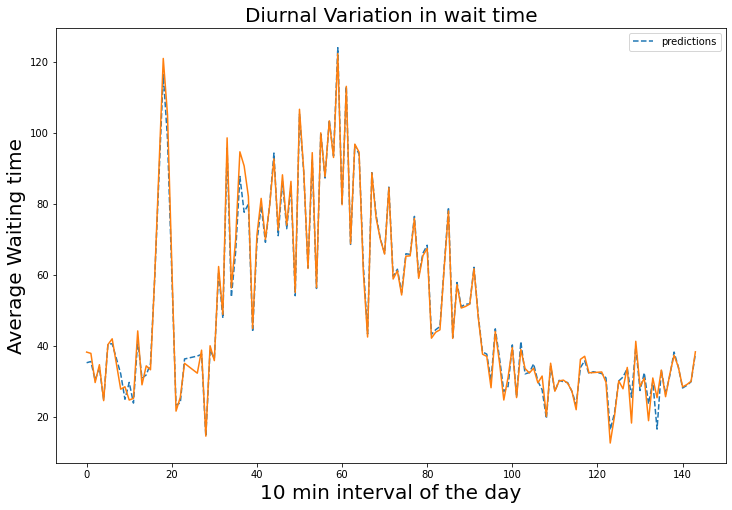

In [23]:
temp = data[data['Wait time']>0].groupby(by='Which 10 min interval in day').mean()
fig = plt.figure(figsize=(12,8))
plt.plot(temp['Predictions'],'--',label='predictions')
plt.plot(temp['Wait time'])
plt.title('Diurnal Variation in wait time',fontsize=20)
plt.xlabel('10 min interval of the day',fontsize=20)
plt.ylabel('Average Waiting time',fontsize=20)
# plt.grid(True)
plt.legend()
plt.show()

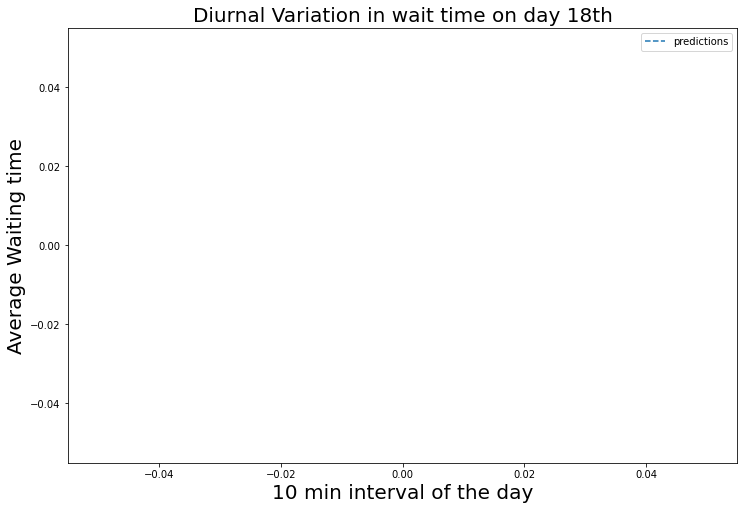

In [24]:
temp = data[data['Which day in week']==18].groupby(by='Which 10 min interval in day').mean()
fig = plt.figure(figsize=(12,8))
plt.plot(temp['Predictions'],'--',label='predictions')
plt.plot(temp['Wait time'])
plt.title('Diurnal Variation in wait time on day 18th',fontsize=20)
plt.xlabel('10 min interval of the day',fontsize=20)
plt.ylabel('Average Waiting time',fontsize=20)
# plt.grid(True)
plt.legend()
plt.show()

In [25]:
import math
math.sqrt(((data['Wait time']-data['Predictions'])**2).sum())

315.51290880203317